In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from .templates import *
from .templates_cls import *
from .experiment_classifier import ClsModel

In [3]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [4]:
cls_conf = ffhq256_autoenc_cls()
cls_model = ClsModel(cls_conf)
state = torch.load(f'checkpoints/{cls_conf.name}/last.ckpt',
                    map_location='cpu')
print('latent step:', state['global_step'])
cls_model.load_state_dict(state['state_dict'], strict=False);
cls_model.to(device);

Global seed set to 0


loading pretrain ... 130M
step: 1563562
loading latent stats ...
latent step: 9375


In [5]:
# data = conf.make_dataset()
# batch = data[10]['img'][None]

In [6]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch = data[0]['img'][None]

In [7]:
cond = model.encode(batch.to(device))
xT = model.encode_stochastic(batch.to(device), cond, T=250)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


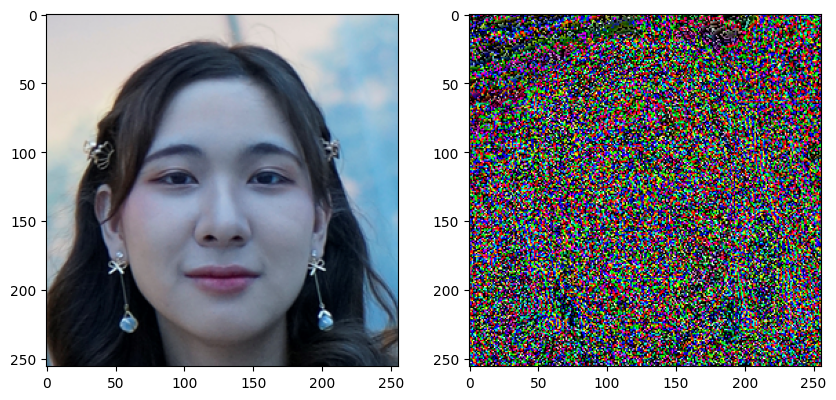

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

In [14]:
print(CelebAttrDataset.id_to_cls)

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [15]:
cls_id = CelebAttrDataset.cls_to_id['Wearing_Necktie']

In [34]:
cond2 = cls_model.normalize(cond)
cond2 = cond2 + 0.3 * math.sqrt(512) * F.normalize(cls_model.classifier.weight[cls_id][None, :], dim=1)
cond2 = cls_model.denormalize(cond2)

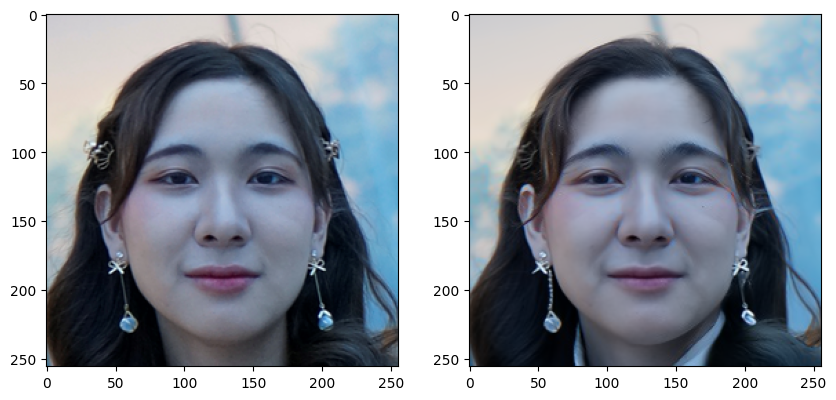

In [35]:
import matplotlib.pyplot as plt
# torch.manual_seed(1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
img = model.render(xT, cond2, T=100)
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(img[0].permute(1, 2, 0).cpu())
plt.savefig('imgs_manipulated/compare.png')

In [36]:
from torchvision.utils import *
save_image(img[0], 'imgs_manipulated/output.png')

In [45]:
F.normalize(cls_model.classifier.weight[cls_id][None, :], dim = 1)

tensor([[ 3.2877e-02, -3.5921e-02, -1.9877e-02, -3.2525e-03, -5.0185e-02,
          3.5058e-02, -6.4058e-02,  4.2934e-02, -4.1252e-02, -2.0355e-03,
         -2.1987e-02, -3.5431e-02,  6.1744e-02,  1.6602e-02, -9.6202e-02,
         -4.0438e-02,  2.5684e-02, -2.9526e-02,  5.6245e-02, -3.0891e-03,
         -7.0964e-02,  2.4649e-02,  1.5688e-02, -2.2531e-02, -2.1360e-02,
          4.3785e-02,  6.8090e-02, -3.2197e-02, -2.3780e-02,  5.2721e-03,
          8.5830e-03, -7.3917e-02,  2.6131e-02,  5.3640e-02, -7.9146e-03,
         -1.1405e-05,  2.3621e-02,  9.2944e-02, -1.4994e-02,  7.0453e-02,
         -4.2044e-02,  3.2214e-03, -2.0080e-02, -8.2424e-03, -4.0842e-02,
         -2.7133e-02,  2.1129e-02, -4.2361e-02,  3.1761e-03,  2.2228e-02,
         -1.3182e-02,  4.3839e-02, -7.2359e-02,  7.6539e-02, -9.3001e-02,
         -2.6300e-02, -6.9927e-03,  2.5122e-02,  1.0394e-01,  4.3808e-02,
          5.2755e-02,  1.1150e-01, -5.0539e-02,  5.5224e-03, -1.3404e-02,
          2.1679e-02,  6.7033e-02,  1.